In [1]:
import pandas as pd

In [2]:
import seaborn as sns

In [3]:
from sklearn.tree import DecisionTreeRegressor

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
penguins = sns.load_dataset('penguins')

In [6]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [7]:
penguins = penguins.dropna()

In [8]:
penguins_train, penguins_test = train_test_split(penguins, test_size=0.3, stratify=penguins['species'], random_state=42)
print(penguins_train.shape, penguins_test.shape)

(233, 7) (100, 7)


In [10]:
features= ['body_mass_g']
dt_regression = DecisionTreeRegressor(max_depth = 3)
dt_regression.fit(penguins_train[features], penguins_train['flipper_length_mm'])

DecisionTreeRegressor(max_depth=3)

In [11]:
from sklearn import tree
import graphviz

def plot_tree_regression(model, features):
    dot_data = tree.export_graphviz(model, out_file=None, 
                          feature_names=features,  
                          filled=True, rounded=True,  
                          special_characters=True)
    graph = graphviz.Source(dot_data)
    graph.render("decision_tree")
    return graph 

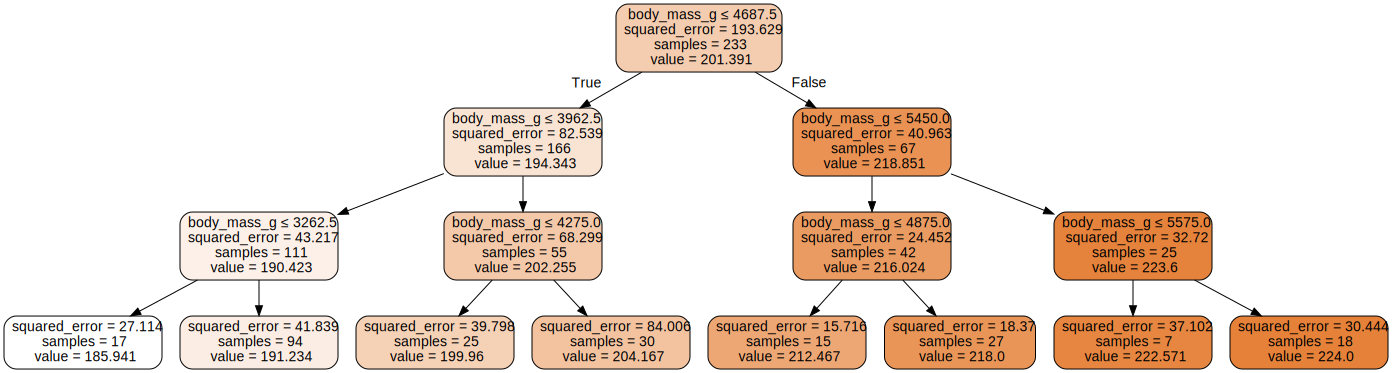

In [12]:
plot_tree_regression(dt_regression, features)

In [13]:
def calculate_rmse(predictions, actuals):
    if(len(predictions) != len(actuals)):
        raise Exception("The amount of predictions did not equal the amount of actuals")
    
    return (((predictions - actuals) ** 2).sum() / len(actuals)) ** (1/2)

In [14]:
predictionsOnTrainset = dt_regression.predict(penguins_train[features])
predictionsOnTestset = dt_regression.predict(penguins_test[features])

In [15]:
rmseTrain = calculate_rmse(predictionsOnTrainset, penguins_train.flipper_length_mm)
rmseTest = calculate_rmse(predictionsOnTestset, penguins_test.flipper_length_mm)

In [16]:
print("RMSE on training set " + str(rmseTrain))
print("RMSE on test set " + str(rmseTest))

RMSE on training set 6.367961156932434
RMSE on test set 6.6100110079037675


The RMSE is different, because we split 30% into one and 70% into the other. This means that one has more data than the other and is therefore going to be different.